Importing Relevant Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

Visualizing the Images

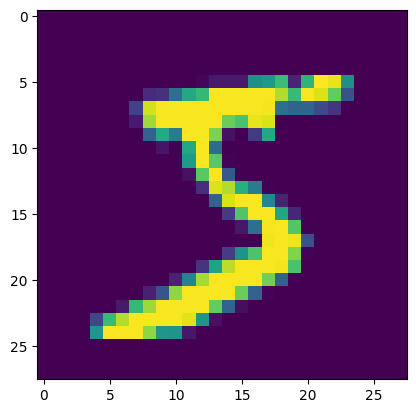

In [4]:
plt.imshow(X_train[0])

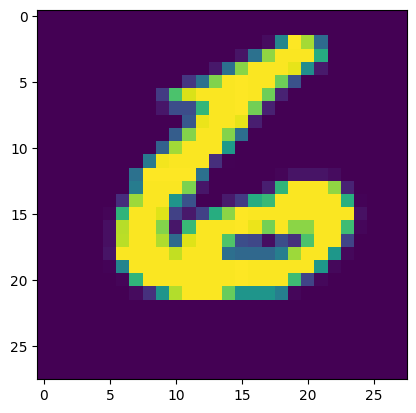

In [5]:
plt.imshow(X_test[-1])

Normalizing the Training data for better model training

In [6]:
X_train = X_train / 255
X_test = X_test / 255

Creating Model

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['acc'])

In [10]:
history = model.fit(X_train, y_train, epochs = 20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8513 - loss: 0.5128 - val_acc: 0.9618 - val_loss: 0.1334
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9641 - loss: 0.1205 - val_acc: 0.9689 - val_loss: 0.1090
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9775 - loss: 0.0748 - val_acc: 0.9690 - val_loss: 0.0978
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9812 - loss: 0.0591 - val_acc: 0.9688 - val_loss: 0.0998
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9863 - loss: 0.0441 - val_acc: 0.9749 - val_loss: 0.0893
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9896 - loss: 0.0318 - val_acc: 0.9715 - val_loss: 0.0987
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9919 - loss: 0.0269 - val_acc: 0.9756 - val_loss: 0.0893
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9938 - loss: 0.0198 - val_acc: 0.9716 - val_loss: 0.1020
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━

In [11]:
Y_pred_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


In [12]:
Y_pred = Y_pred_prob.argmax(axis=1)

In [13]:
accuracy_score(Y_pred, y_test)

0.9757

Visualizing the model accuracy history using Matplotlib

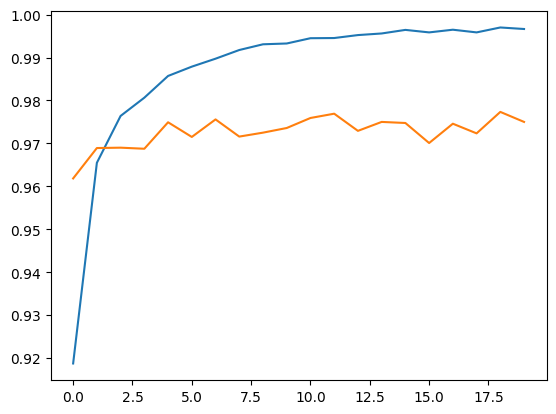

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

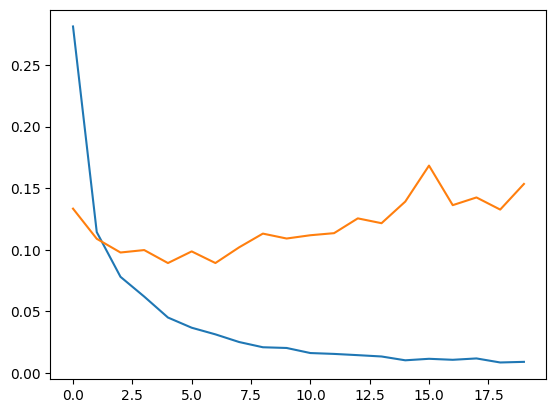

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])